# Statistical Methods for High Dimensional Data project

Statistical project focused on dimensionality reduction methods to perform classification to detect the presence of Parkinson's disease using speech signals.

First of all we import libraries, open the data and explore a bit the architecture of the dataset.

In [46]:
library(glmnet)

In [2]:
rm(list = ls())
data <- read.csv("pd_speech_features.csv",header = T,skip = 1)

In [3]:
data

id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,⋯,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,1,0.85247,0.71826,0.57227,240,239,0.008063530,0.000086800,0.00218,⋯,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
0,1,0.76686,0.69481,0.53966,234,233,0.008258256,0.000073100,0.00195,⋯,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
0,1,0.85083,0.67604,0.58982,232,231,0.008339590,0.000060400,0.00176,⋯,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,⋯,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
1,0,0.32790,0.79782,0.53028,236,235,0.008161574,0.002668863,0.00535,⋯,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
1,0,0.50780,0.78744,0.65451,226,221,0.007631204,0.002696381,0.00783,⋯,4.8025,5.0734,7.0166,5.9966,5.2065,7.4246,3.4153,3.5046,3.2250,1
2,1,0.76095,0.62145,0.54543,322,321,0.005990989,0.000107266,0.00222,⋯,117.2678,75.3156,32.0478,7.7060,3.1060,4.6206,12.8353,13.8300,7.7693,1
2,1,0.83671,0.62079,0.51179,318,317,0.006073855,0.000135739,0.00282,⋯,3.8564,11.8909,7.2891,4.3682,3.6443,5.9610,11.7552,18.0927,5.0448,1
2,1,0.80826,0.61766,0.50447,318,317,0.006057188,0.000069300,0.00161,⋯,2.2640,6.3993,4.4165,4.2662,3.6357,3.7346,2.9394,3.6216,3.8430,1
3,0,0.85302,0.62247,0.54855,493,492,0.003910221,0.000039900,0.00075,⋯,1.6796,2.0474,2.8117,3.5070,3.2727,3.8415,3.9439,5.8807,38.7211,1


However, we don't want to lose the first row that contains the "macrocategories" of the features, so we keep it.

In [4]:
data_1 <- read.csv("pd_speech_features.csv",header = F)
data_1 <- data_1[1,]
rm(data_1)

In [5]:
dt <- cbind(c("3-23","24-26","27-30","31-34","35-56","57-140","141-322","323-755"),c("Baseline Feature","Intensity Parameters","Formant Frequencies","Bandwidth Parameters","Vocal Fold","MFCC","Wavelet Features","TQWT Features"))
colnames(dt) <- c("Colonne","Descrizione")

Here we can see the macrocategories names and the relative column numbers. Note that in the first column we have the ID while in the second there is the gender of the person.

In [6]:
dt

Colonne,Descrizione
3-23,Baseline Feature
24-26,Intensity Parameters
27-30,Formant Frequencies
31-34,Bandwidth Parameters
35-56,Vocal Fold
57-140,MFCC
141-322,Wavelet Features
323-755,TQWT Features


In [7]:
# Here we print the first names of the features as example
head(colnames(data))

[1] "id"        "gender"    "PPE"       "DFA"       "RPDE"      "numPulses"

First of all we removed the ID and we can also notice that we don't have any missing value. Just for our convenience we shift the response variable in the first column.

In [8]:
id <- data[,1]
data <- data[,-1]
data <- cbind(data[grep("class",colnames(data))],data[-grep("class",colnames(data))])
colnames(data)[1] <- "y"

In [9]:
head(data["y"])

y
1
1
1
1
1
1


Let's see whether the values in the response variable are balanced.

In [10]:
data$y <- as.factor(data$y)
data$gender <- as.factor(data$gender)
prop.table(table(data$y))


        0         1 
0.2539683 0.7460317 

Data are quite unbalanced but not so much, so it's not a big deal.<br>
We now proceed dividing the dataset into training and validation set.

In [11]:
set.seed(69)
train_fraction = 0.75
train_id <- sample(1:nrow(data), train_fraction*nrow(data))
train_set <- data[train_id,]
test_set <- data[-train_id,]

In [12]:
dim(train_set)

[1] 567 754

In [13]:
dim(test_set)

[1] 189 754

Let's check if the response variable is balanced in the two sets.

In [14]:
table(train_set$y)/length(train_set$y)
res <- 1


        0         1 
0.2557319 0.7442681 

In [15]:
table(test_set$y)/length(test_set$y)


        0         1 
0.2486772 0.7513228 

Ok, fortunately as we imagine the proportion are roughly still the same. <br>
Moreover, we have to say that the displacement of the response variable is not a problem from a computational point of view; on the contrary, it's an issue at a theoretical level that appears when we analyze the quality of the model, because a classificator constructed upon an unbalanced response variable tends to assign too much weight to one of those values.<br>
The solution we propose consists in selecting a correct threshold that separates the classification boundary: this threshold will be chosen (approximately) equal to the lower frequency of the mode of the response variable.<br>
Proceeding with this method, we decided to assign a higher cost to the incorrect classification of the **rare event** rather than that of the most frequent event.<br>
(Another alternative would be to balance the dataset but we would lose a lot of the data).

In [18]:
# Define the threshold
cutoff <- 0.2557319

At this point we make a couple of adjustments, that is we save the y variable of the training set and the test set in numerical form, which we will use later.
Then we define the formula object that we will need to build the Model.matrix and to use the models, one with the quantitative response variable and one with the latter as a factor.

In [21]:
y_num <- as.numeric(train_set$y)-1
#table(y_num)  # quantitative of training_set
g <- as.numeric(test_set$y)-1
#table(g)      # quantitative of test_set

In [27]:
res <- 1
f1 <- as.formula(paste("y ~ ", paste(names(train_set)[-c(res)], collapse = "+"), collapse = ""))
#f1 # qualitative response

In [28]:
f1

y ~ gender + PPE + DFA + RPDE + numPulses + numPeriodsPulses + 
    meanPeriodPulses + stdDevPeriodPulses + locPctJitter + locAbsJitter + 
    rapJitter + ppq5Jitter + ddpJitter + locShimmer + locDbShimmer + 
    apq3Shimmer + apq5Shimmer + apq11Shimmer + ddaShimmer + meanAutoCorrHarmonicity + 
    meanNoiseToHarmHarmonicity + meanHarmToNoiseHarmonicity + 
    minIntensity + maxIntensity + meanIntensity + f1 + f2 + f3 + 
    f4 + b1 + b2 + b3 + b4 + GQ_prc5_95 + GQ_std_cycle_open + 
    GQ_std_cycle_closed + GNE_mean + GNE_std + GNE_SNR_TKEO + 
    GNE_SNR_SEO + GNE_NSR_TKEO + GNE_NSR_SEO + VFER_mean + VFER_std + 
    VFER_entropy + VFER_SNR_TKEO + VFER_SNR_SEO + VFER_NSR_TKEO + 
    VFER_NSR_SEO + IMF_SNR_SEO + IMF_SNR_TKEO + IMF_SNR_entropy + 
    IMF_NSR_SEO + IMF_NSR_TKEO + IMF_NSR_entropy + mean_Log_energy + 
    mean_MFCC_0th_coef + mean_MFCC_1st_coef + mean_MFCC_2nd_coef + 
    mean_MFCC_3rd_coef + mean_MFCC_4th_coef + mean_MFCC_5th_coef + 
    mean_MFCC_6th_coef + mean_MFCC_7th

In [29]:
f2 <- as.formula(paste("y_num ~ ", paste(names(train_set)[-c(res)], collapse = "+"), collapse = ""))
#f2 # quantitative response

In [30]:
f2

y_num ~ gender + PPE + DFA + RPDE + numPulses + numPeriodsPulses + 
    meanPeriodPulses + stdDevPeriodPulses + locPctJitter + locAbsJitter + 
    rapJitter + ppq5Jitter + ddpJitter + locShimmer + locDbShimmer + 
    apq3Shimmer + apq5Shimmer + apq11Shimmer + ddaShimmer + meanAutoCorrHarmonicity + 
    meanNoiseToHarmHarmonicity + meanHarmToNoiseHarmonicity + 
    minIntensity + maxIntensity + meanIntensity + f1 + f2 + f3 + 
    f4 + b1 + b2 + b3 + b4 + GQ_prc5_95 + GQ_std_cycle_open + 
    GQ_std_cycle_closed + GNE_mean + GNE_std + GNE_SNR_TKEO + 
    GNE_SNR_SEO + GNE_NSR_TKEO + GNE_NSR_SEO + VFER_mean + VFER_std + 
    VFER_entropy + VFER_SNR_TKEO + VFER_SNR_SEO + VFER_NSR_TKEO + 
    VFER_NSR_SEO + IMF_SNR_SEO + IMF_SNR_TKEO + IMF_SNR_entropy + 
    IMF_NSR_SEO + IMF_NSR_TKEO + IMF_NSR_entropy + mean_Log_energy + 
    mean_MFCC_0th_coef + mean_MFCC_1st_coef + mean_MFCC_2nd_coef + 
    mean_MFCC_3rd_coef + mean_MFCC_4th_coef + mean_MFCC_5th_coef + 
    mean_MFCC_6th_coef + mean_MFCC

At this point we just have to find the model.matrix in the training and test set; first of all we normalize the variables.

In [32]:
X.train <- model.matrix(~., data = train_set[,-res])[, -1] # without intercept
X.test <- model.matrix(~., data = test_set[,-res])[, -1] # without intercept

In [36]:
std.train_set <- train_set
for(i in 3:nrow(train_set)){std.train_set[, i] <- scale(std.train_set[, i])}
X.std.train_set <- model.matrix(~., data = std.train_set[,-res])[, -1] # without intercept

std.test_set <- test_set
for(i in 3:nrow(test_set)){ std.test_set[, i] <- scale(std.test_set[, i])}
X.std.test_set <- model.matrix(~., data = std.test_set[,-res])[, -1] # without intercept

rm(std.train_set, std.test_set)

At this point we have created the model.matrix of the training and test set both in standardized version and in the original one.<br>
We now wanna define a function to capture the goodness/accuracy of our model.

In [114]:
table.summary <- function(predicted,reals,cutoff=NA){
  results <- list()
  if(!is.na(cutoff)){
    predicted <- predicted>cutoff
  }
  tab <- table(predicted, reals)
  accuracy <- sum(diag(tab))/sum(tab)
  error <- 1-accuracy
  cat('Confusion matrix\n')
  print(tab)
  cat('Accuracy: ',accuracy,'\n')
  cat('Error: ',error,'\n')
  if(ncol(tab)==2){
    precision <- tab[2,2]/sum(tab[,2])
    recall <- tab[2,2]/sum(tab[2,])
    f1 <- 2*precision*recall/(precision+recall)
    
    cat('Precision: ',precision,'\n')
    cat('Recall: ',recall,'\n')
    cat('F1: ',f1,'\n')
  }
  results <- list(confusion.matrix=tab,accuracy=accuracy,error=error)
  if(ncol(tab)==2){
    results$precision <- precision
    results$recall <- recall
    results$F1 <- f1
  }
  return(results)
}

Let's begin with some model: the first one we can do is the **Logistic Lasso**.

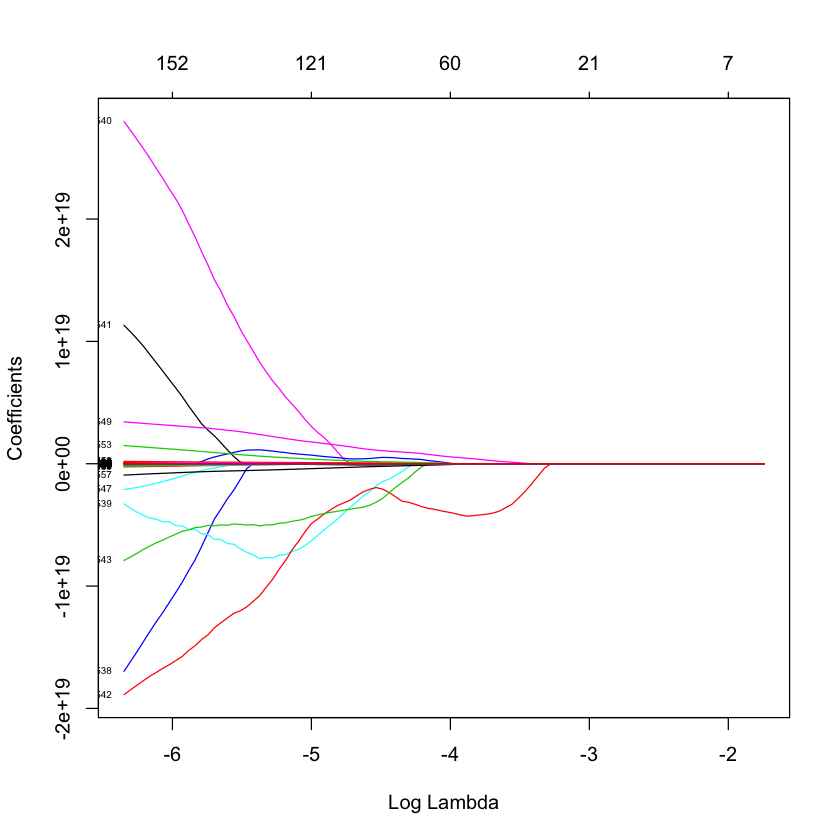

In [115]:
fit <- glmnet(X.train, train_set$y, family = "binomial",standardize = T)
plot(fit, xvar="lambda", label=TRUE)

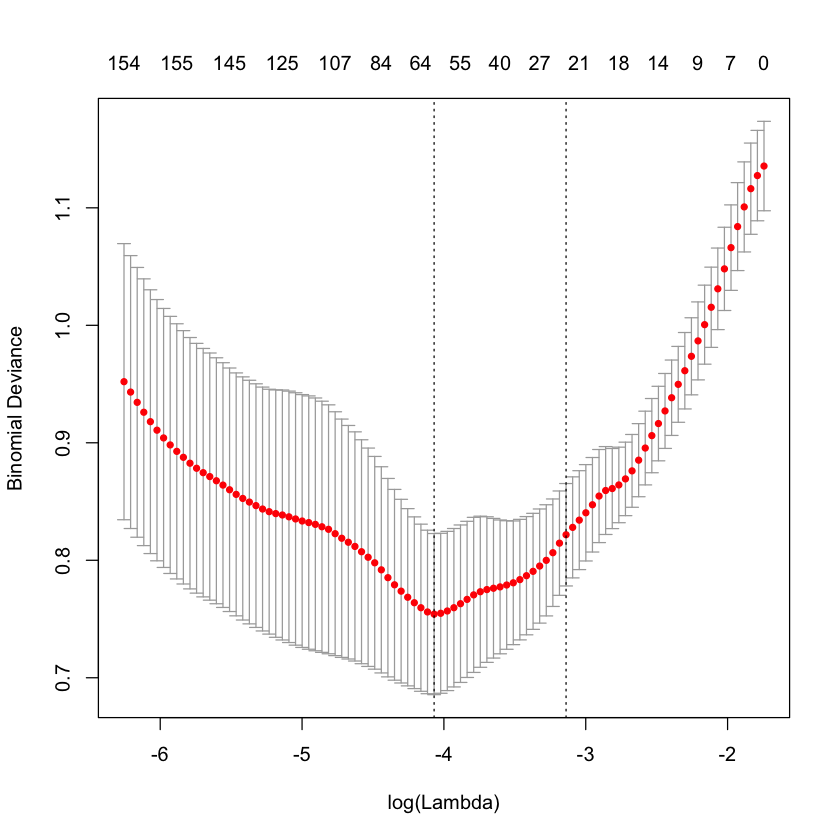

In [116]:
cfit <- cv.glmnet(X.train, train_set$y,standardize=T,family="binomial")
plot(cfit)

Now we are using a model with some coefficient set to zero because we wanted to apply a dimensionality reduction method since we had too much features.


In [117]:
cfit$lambda.1se

[1] 0.04333773

In [118]:
# Lambda for which we have the better (lower) binomial deviance.

cfit$lambda.min

[1] 0.01709329

In [119]:
coef(cfit)

754 x 1 sparse Matrix of class "dgCMatrix"
                                           1
(Intercept)                    -1.727257e+00
gender1                         .           
PPE                             .           
DFA                             1.477105e+00
RPDE                            .           
numPulses                       .           
numPeriodsPulses                .           
meanPeriodPulses                .           
stdDevPeriodPulses              .           
locPctJitter                    .           
locAbsJitter                    .           
rapJitter                       .           
ppq5Jitter                      .           
ddpJitter                       .           
locShimmer                      .           
locDbShimmer                    .           
apq3Shimmer                     .           
apq5Shimmer                     .           
apq11Shimmer                    .           
ddaShimmer                      .           
meanAutoCorr

In [120]:
# We try to make prediction with lambda = lambda min 

p.fit <- predict(cfit, newx=X.test,s="lambda.min",type="response")
#lr.lasso.logistico  <- lift.roc(p.fit, g, type = "crude", plot.it = FALSE)

In [121]:
table.summary(p.fit, test_set$y, cutoff)

Confusion matrix
         reals
predicted   0   1
    FALSE  15   1
    TRUE   32 141
Accuracy:  0.8253968 
Error:  0.1746032 
Precision:  0.9929577 
Recall:  0.8150289 
F1:  0.8952381 


$confusion.matrix
         reals
predicted   0   1
    FALSE  15   1
    TRUE   32 141

$accuracy
[1] 0.8253968

$error
[1] 0.1746032

$precision
[1] 0.9929577

$recall
[1] 0.8150289

$F1
[1] 0.8952381


In [122]:
# Try to predict with the model having lambda = lambda.1se

p.fit_1se <- predict(cfit, newx=X.test,s="lambda.1se",type="response")
#lr.lasso.logistico  <- lift.roc(p.fit, g, type = "crude", plot.it = FALSE)

In [123]:
table.summary(p.fit_1se, test_set$y, cutoff)

Confusion matrix
         reals
predicted   0   1
    FALSE   3   0
    TRUE   44 142
Accuracy:  0.7671958 
Error:  0.2328042 
Precision:  1 
Recall:  0.7634409 
F1:  0.8658537 


$confusion.matrix
         reals
predicted   0   1
    FALSE   3   0
    TRUE   44 142

$accuracy
[1] 0.7671958

$error
[1] 0.2328042

$precision
[1] 1

$recall
[1] 0.7634409

$F1
[1] 0.8658537


It is evident that for almost all the metrics, the last value of lambda performs worse than the lambda.min, used in the previous prediction step.